# Multi-Class Image Classification
We have selected 10 categories fromthe Food-101 dataset consists of 101 food categories with 750 training and 250 test images per category, making a total of 101k images.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

In [ ]:
# dataset_url: https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Downloads a file from a URL if it not already in the cache.
data_dir = tf.keras.utils.get_file(
    fname="10_food_classes_all_data.zip",
    origin="https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip",
    extract=True,
    cache_subdir="/content",
    cache_dir='.'
)

519183241/519183241 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
data_dir

'/content/10_food_classes_all_data_extracted'

In [ ]:
data_dir = pathlib.Path(data_dir+"/10_food_classes_all_data")
data_dir

PosixPath('/content/10_food_classes_all_data_extracted/10_food_classes_all_data')

In [ ]:
# i want to walk on this data_dir
import os

for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data_extracted/10_food_classes_all_data/test

In [ ]:
# get class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*train/*')]))
print(class_names)



['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
data_dir

PosixPath('/content/10_food_classes_all_data_extracted/10_food_classes_all_data')

In [ ]:

count_image = len(list(data_dir.glob('*/*/*.jpg')))
count_image

10000

In [ ]:

def random_image_show(folder_name="ramen"):
  imges = list(data_dir.glob(f'*/*{folder_name}/*'))
  img = np.random.choice(imges,1)[0]
  print(str(img))
  print(str(img.name))
  plt.figure(figsize=(10,10))
  return PIL.Image.open(str(img))



/content/10_food_classes_all_data_extracted/10_food_classes_all_data/train/pizza/875262.jpg
875262.jpg


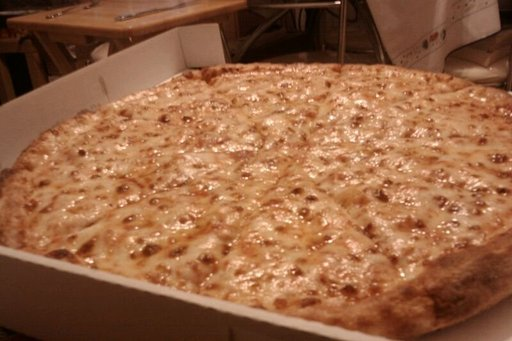

<Figure size 1000x1000 with 0 Axes>

In [ ]:
random_image_show("pizza")

In [ ]:
# get class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*train/*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## Load data using a Keras Utility

In [ ]:
train_dir = data_dir / "train"
test_dir = data_dir / "test"

batch_size = 32
img_height = 224
img_width = 224


train_ds = tf.keras.utils.image_dataset_from_directory(
 train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size

)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_ds.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
len(train_ds)   #

235

In [ ]:
7500/32

234.375

32


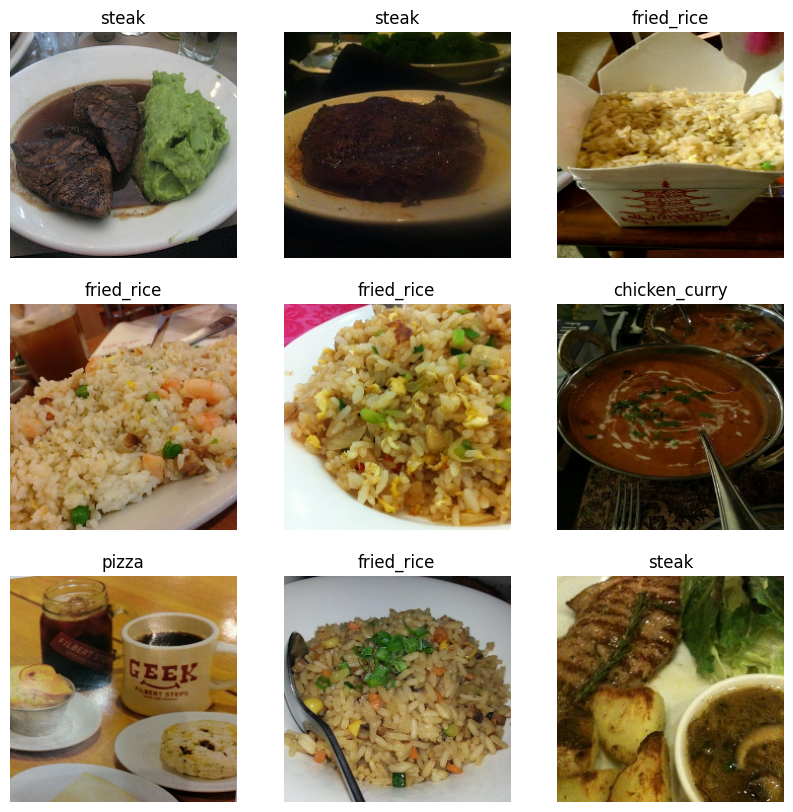

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print( len(images))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
len(next(iter(train_ds)))

2

## Scaling of Image with two method
+ by using train_ds.map()
+ add rescaling layer to the sequence



In [ ]:

# notmalization_layer is used to normilation of image in the range of 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:



image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
for images, labels in normalized_ds.take(1):
  print(np.min(images[0].numpy()), np.max(images[0].numpy()))

0.0 1.0


## Model Creation

In [ ]:
model_one = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation="softmax")
    ]
)


model_one.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


model_one_history = model_one.fit(
    train_ds,
    epochs=15,
    validation_data=test_ds,
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.1447 - loss: 2.2575 - val_accuracy: 0.2412 - val_loss: 2.0866
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.2586 - loss: 2.0410 - val_accuracy: 0.2876 - val_loss: 2.0457
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.3906 - loss: 1.7578 - val_accuracy: 0.3308 - val_loss: 2.0556
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 638s 3s/step - accuracy: 0.6070 - loss: 1.1740 - val_accuracy: 0.2848 - val_loss: 2.8739
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.8444 - loss: 0.4807 - val_accuracy: 0.2708 - val_loss: 3.7635
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9580 - loss: 0.1498

In [ ]:
model_one.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [ ]:
model_one.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2511 - loss: 7.7955


[7.665615558624268, 0.2540000081062317]

In [ ]:
# Visualization traning data
# create plot of loss and accuracy curve of training and test data
def loss_accuracy_plot(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

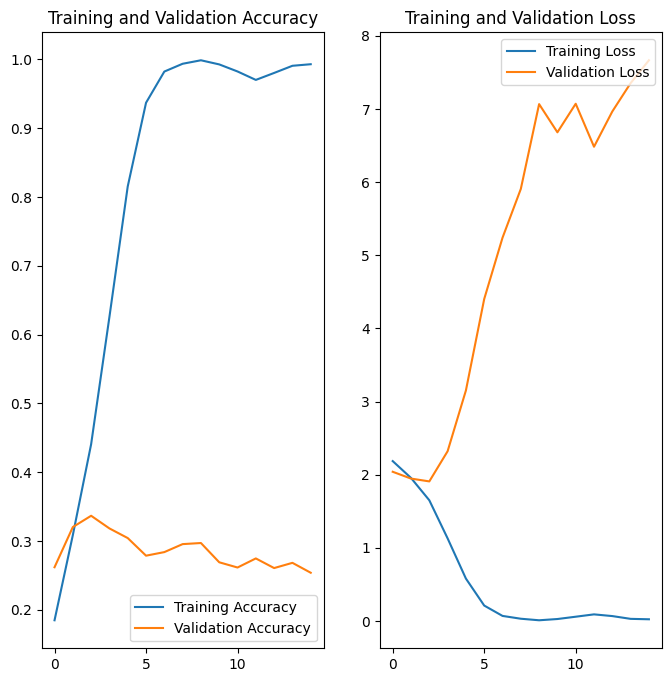

In [ ]:
loss_accuracy_plot(model_one_history,15)

For the graph we get the idea that the model is not performing well on the unseen data and it learn to much on the training data. So we can say that the model is overfitting.

In [ ]:
import tensorflow as tf

model_improved = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Rescaling(1./255),

    # First Convolutional Block
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    # Flatten or Global Average Pooling
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(10, activation="softmax") # Output layer
])

model_improved.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),  # Lower learning rate
    metrics=["accuracy"]
)

model_improved_history = model_improved.fit(
    train_ds,
    epochs=15,
    validation_data=test_ds,
)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.1847 - loss: 2.5333 - val_accuracy: 0.2936 - val_loss: 1.9856
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.3674 - loss: 1.8281 - val_accuracy: 0.2960 - val_loss: 2.0027
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.4982 - loss: 1.5158 - val_accuracy: 0.3132 - val_loss: 2.0226
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.6754 - loss: 1.0357 - val_accuracy: 0.3044 - val_loss: 2.3564
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8151 - loss: 0.6135 - val_accuracy: 0.2792 - val_loss: 2.9924
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.9258 - loss: 0.2954 - val_accuracy: 0.2592 - val_loss: 3.4822
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9750 - loss: 0.1317 - val_accuracy: 0.2804 - val_loss: 4.1019
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9945 - loss: 0.0525 - 

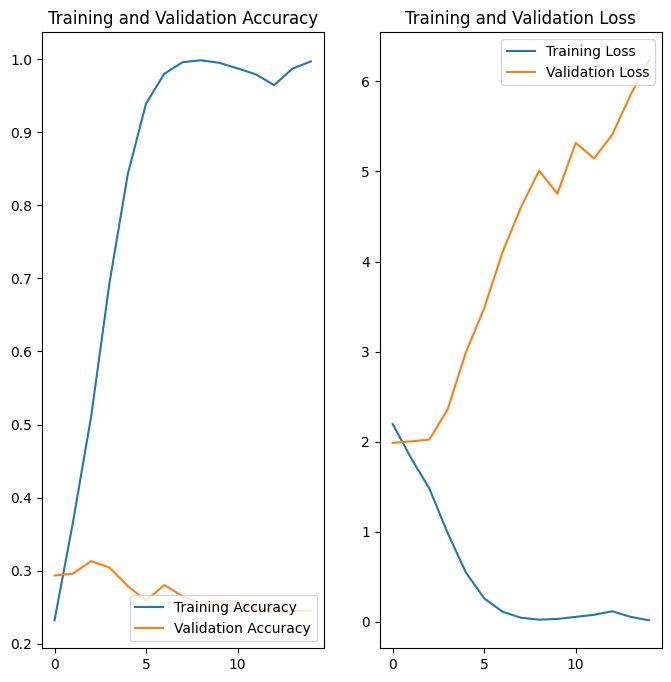

In [ ]:
loss_accuracy_plot(model_improved_history,15)

 From the graph we get the point that the model is not perfoming well on the unseen data and the model learn well on the training data so the loss of test data is very high and loss of training
data is loss so we know that when the model is perfom well on training data and not on the test data this we say that this is overfitting

## Reduce overfitting Methods
Data Augmentation in Your Model

✅ Prevents Overfitting: Augments images dynamically, making the model generalize better.

✅ Simulates Real-World Variations: Rotation, zoom, and flipping improve robustness.

✅ Improves Validation Accuracy: Helps the model learn variations instead of memorizing data.

In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),       # Rotate images slightly
])






In [ ]:
for image, labes in test_ds.take(1):
  first_image = image[0]

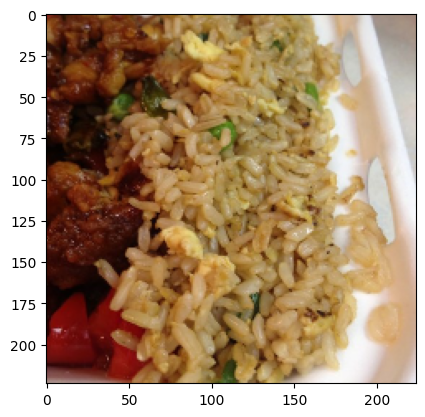

In [ ]:
plt.imshow(first_image.numpy().astype("uint8"))


In [ ]:
import tensorflow as tf

model_three = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    # First Convolutional Block
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),

    # Flatten or Global Average Pooling
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(10, activation="softmax") # Output layer
])

model_three.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),  # Lower learning rate
    metrics=["accuracy"]
)

model_three_history = model_three.fit(
    train_ds,
    epochs=15,
    validation_data=test_ds,
)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.1636 - loss: 2.5598 - val_accuracy: 0.3084 - val_loss: 1.9517
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.2985 - loss: 1.9791 - val_accuracy: 0.3400 - val_loss: 1.9156
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.3420 - loss: 1.8969 - val_accuracy: 0.3428 - val_loss: 1.9109
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.3575 - loss: 1.8532 - val_accuracy: 0.3816 - val_loss: 1.7854
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.3873 - loss: 1.7897 - val_accuracy: 0.3872 - val_loss: 1.7962
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.4061 - loss: 1.7605 - val_accuracy: 0.4160 - val_loss: 1.7351
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4289 - loss: 1.7160 - val_accuracy: 0.4048 - val_loss: 1.7634
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.4172 - loss: 1.7082 - 

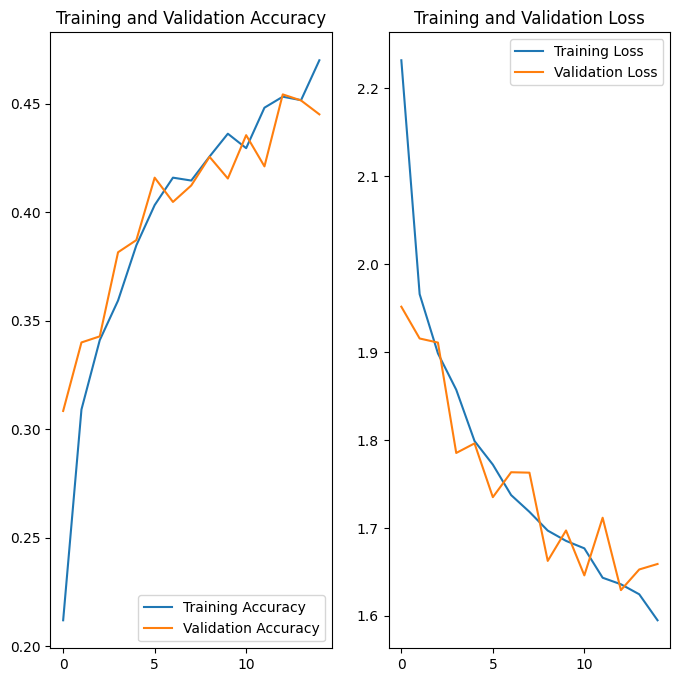

In [ ]:
loss_accuracy_plot(model_three_history,15)

!WOW from the graph we get the idea that the training loss and validataon loss line move downward in same direction if we train our model for long period  like (epochs 50 etc) we can easily increse the accuracy of the model.

## Prediction On Custom Data

In [33]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [78]:
def image_prediction(image_url:str):
  img = tf.keras.utils.load_img(
  image_url, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model_three.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  plt.imshow(tf.squeeze(img_array.numpy().astype("uint8")))
  plt.title(f" {class_names[np.argmax(score)]} with a {100 * np.max(score):.2f}% confidence.")




In [79]:
!ls /content/03-steak.jpeg

/content/03-steak.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


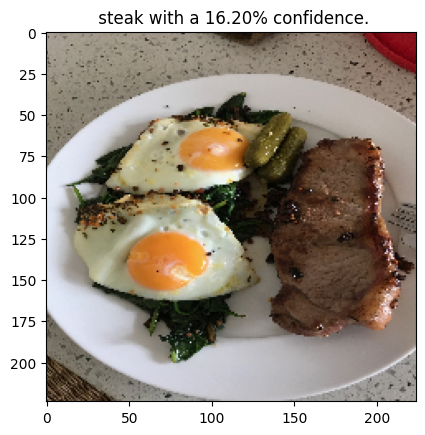

In [80]:
image_prediction("/content/03-steak.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


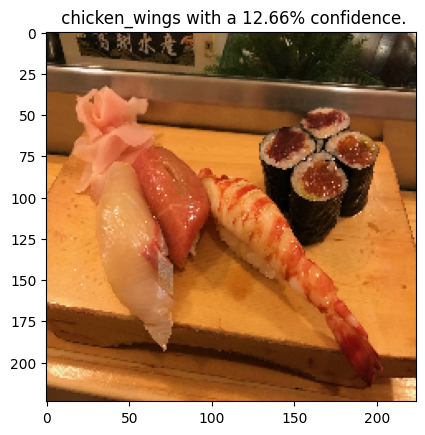

In [81]:
image_prediction("/content/03-sushi.jpeg")


In [82]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


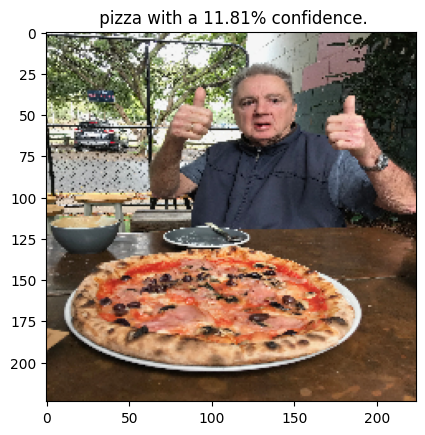

In [83]:
image_prediction("/content/03-pizza-dad.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


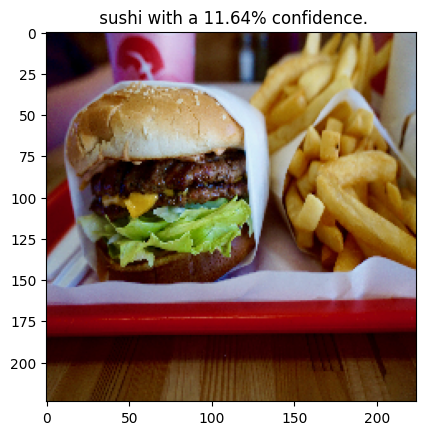

In [84]:
image_prediction("/content/03-hamburger.jpeg")

## Save The Entire Model
 Save a model's architecture, weights, and training configuration in a single model.keras zip archive.
 The model is save in three different formats
 + Keras
 + savedmodel
 + HDF5

The recommended way to save the model is the keras
Save the entire model as a `.keras` zip archive.
model.save('my_model.keras')  


In [89]:
# save model in keras format
model_three.save("my_model_three.keras")
# this method save the model architecture, weights, and training etc all in a single file


In [90]:
# load the model

model_loaded = tf.keras.models.load_model("my_model_three.keras")

In [91]:
model_loaded.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [92]:
model_loaded.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4376 - loss: 1.6962


[1.6590420007705688, 0.44519999623298645]

In [93]:
model_three.evaluate(test_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4396 - loss: 1.7044


[1.6590416431427002, 0.44519999623298645]